# Proyecto Extra: Segmentacion de clientes mediante RFM en la industria del Streaming de Video

# Etapa 1: Importación de las bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 2: Importación de la base de datos

In [3]:
ruta_dataset = 'amazon_prime_users.csv'
df_amazon_prime=pd.read_csv(ruta_dataset)
df_amazon_prime.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [4]:
df_amazon_prime.shape

(2500, 19)

In [5]:
df_amazon_prime.keys()

Index(['User ID', 'Name', 'Email Address', 'Username', 'Date of Birth',
       'Gender', 'Location', 'Membership Start Date', 'Membership End Date',
       'Subscription Plan', 'Payment Information', 'Renewal Status',
       'Usage Frequency', 'Purchase History', 'Favorite Genres',
       'Devices Used', 'Engagement Metrics', 'Feedback/Ratings',
       'Customer Support Interactions'],
      dtype='object')

In [6]:
df_amazon_prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o


### Descripcion de campos
| Campo | Descripcion |
| --- | --- |
|1. User ID: |                         ID numerico para el usuario.|
|2. Name: |                            Nombre de usuario. |
|3. Email Address: |                   Direccion email del usuario. |
|4. Username: |                       Username del usuario. |
|5. Date of Birth: |                  Cumpleanios del usuario. |
|6. Gender: |                          Genero del usuario. |
|7. Location: |                        Localizacion del usuario. |
|8. Membership Start Date: |           Fecha de inicio de la membresía de Amazon Prime. |
|9. Membership End Date: |             Fecha de finalización de la membresía. |
|10. Subscription Plan: |              Tipo de plan de suscripción (por ejemplo, anual, mensual). |
|11. Payment Information: |            Método de pago utilizado. |
|12. Renewal Status: |                 Ya sea que la renovación sea manual o automática. |
|13. Usage Frequency: |                Frecuencia de uso de la plataforma (por ejemplo, Regular, Frecuente). |
|14. Purchase History: |               Tipos de artículos que se compran con frecuencia. |
|15. Favorite Genres: |                Géneros de contenido favoritos. |
|16. Devices Used: |                   Dispositivos utilizados para acceder a la plataforma. |
|17. Engagement Metrics: |             Nivel de participación (por ejemplo, bajo, medio, alto). |
|18. Feedback/Ratings: |               Valoración o comentarios promedio otorgados por el usuario. |
|19. Customer Support Interactions: |  Número de interacciones con el servicio de atención al cliente. |



In [7]:
df_amazon_prime.describe()

,User ID,Feedback/Ratings,Customer Support Interactions
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,4.004760,4.951600
std,721.83216,0.580769,3.191572
min,1.00000,3.000000,0.000000
25%,625.75000,3.500000,2.000000
50%,1250.50000,4.000000,5.000000
75%,1875.25000,4.500000,8.000000
max,2500.00000,5.000000,10.000000


In [ ]:
# Conviertimos las columnas 'Fecha de nacimiento' y 'Fecha de membresía' a formato datetime.
df_amazon_prime['Date of Birth'] = pd.to_datetime(df_amazon_prime['Date of Birth'])
df_amazon_prime['Membership Start Date'] = pd.to_datetime(df_amazon_prime['Membership Start Date'])
df_amazon_prime['Membership End Date'] = pd.to_datetime(df_amazon_prime['Membership End Date'])

# Etapa 3: Visualización de los datos

### Análisis demográfico: Distribución por edad y sexo.

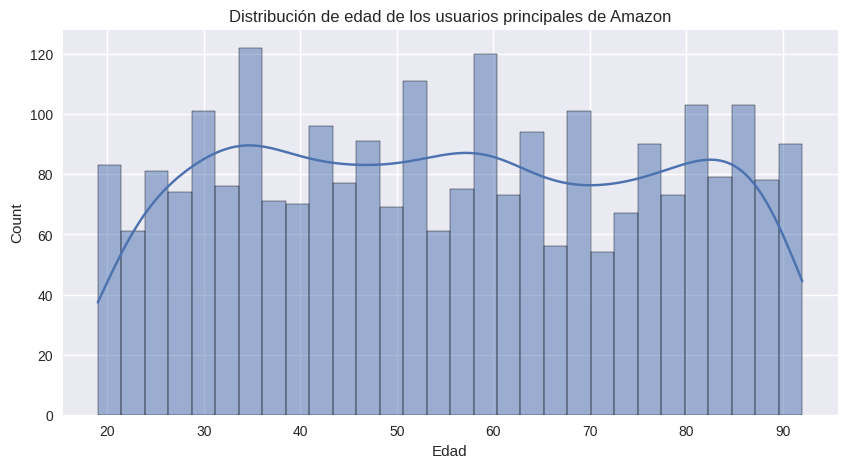

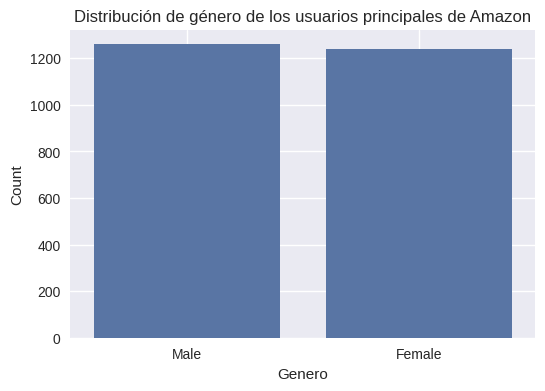

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Calculamos la edad
current_year = datetime.now().year
df_amazon_prime['Age'] = current_year - df_amazon_prime['Date of Birth'].dt.year

# Gráfico de distribución de edades
plt.figure(figsize=(10, 5))
sns.histplot(df_amazon_prime['Age'], bins=30, kde=True)
plt.title('Distribución de edad de los usuarios principales de Amazon')
plt.xlabel('Edad')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Gráfico de distribución por genero
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df_amazon_prime)
plt.title('Distribución de género de los usuarios principales de Amazon')
plt.xlabel('Genero')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Análisis de suscripciones y renovaciones

In [9]:
variables_unicas = df_amazon_prime['Subscription Plan'].unique()
print(variables_unicas)

['Annual' 'Monthly']


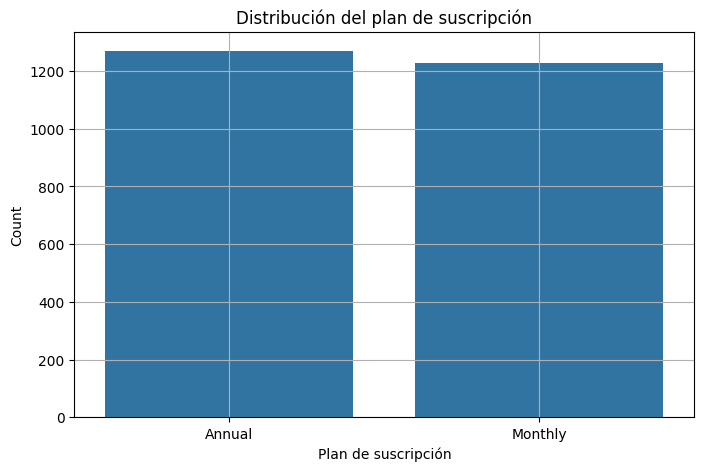

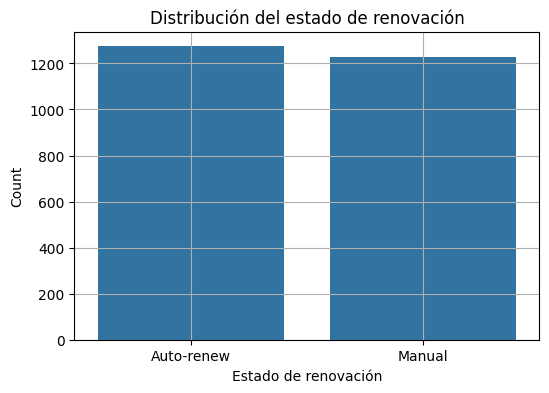

In [10]:
# Distribución del plan de suscripción
plt.figure(figsize=(8, 5))
sns.countplot(x='Subscription Plan', data=df_amazon_prime, order=df_amazon_prime['Subscription Plan'].value_counts().index)
plt.title('Distribución del plan de suscripción')
plt.xlabel('Plan de suscripción')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Distribución del estado de renovación
plt.figure(figsize=(6, 4))
sns.countplot(x='Renewal Status', data=df_amazon_prime, order=df_amazon_prime['Renewal Status'].value_counts().index)
plt.title('Distribución del estado de renovación')
plt.xlabel('Estado de renovación')
plt.ylabel('Count')
plt.grid(True)
plt.show()



### Análisis de Suscripciones y Renovaciones

**1.-** Distribución de Planes de Suscripción: Los datos revelan una variedad de planes de suscripción, siendo los planes mensuales los más comunes entre los usuarios. Esta preferencia por las suscripciones mensuales podría indicar una necesidad de flexibilidad o una menor resistencia al compromiso, lo cual puede aprovecharse en estrategias de marketing para promocionar estos planes o introducir periodos de prueba que incentiven la transición a planes anuales.

**2.-** Distribución del Estado de Renovación: La mayoría de los usuarios tiene un plan de renovación automática, lo que indica una alta retención de usuarios y menos fricción en la renovación. Esto es una señal positiva para la estabilidad de los ingresos recurrentes. Las estrategias de marketing podrían centrarse en convertir a los usuarios de la renovación manual a la automática, destacando la comodidad y ofreciendo incentivos para el cambio.

### Habitos de consumo - Uso del servicio


Categorías de frecuencia:
['Regular' 'Frequent' 'Occasional']

Tipos de plan:
['Annual' 'Monthly']

 Conteo manual:

Frequent:
  Monthly: 411 usuarios
  Annual: 440 usuarios

Regular:
  Monthly: 423 usuarios
  Annual: 404 usuarios

Occasional:
  Monthly: 395 usuarios
  Annual: 427 usuarios


<Figure size 800x500 with 0 Axes>

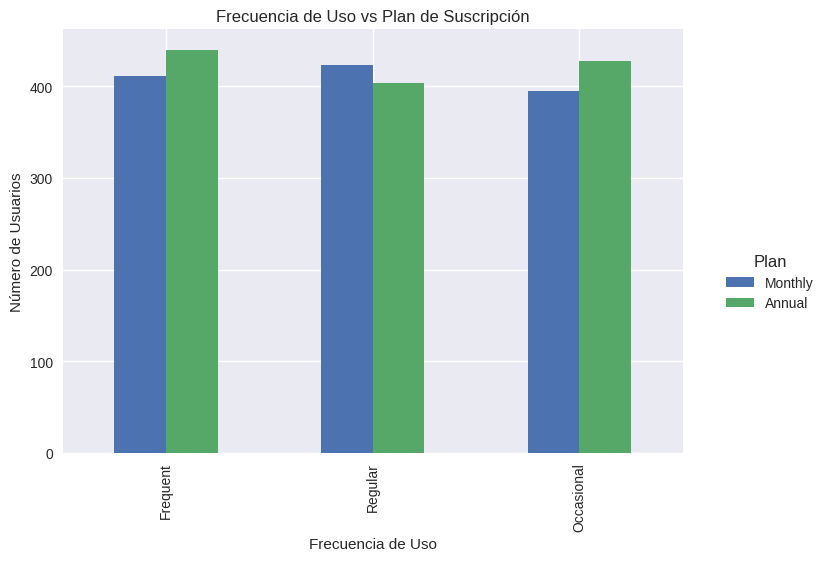

In [30]:
# Ver las categorías únicas
print("\nCategorías de frecuencia:")
print(df_amazon_prime['Usage Frequency'].unique())
print("\nTipos de plan:")
print(df_amazon_prime['Subscription Plan'].unique())

# Conteo
print("\n Conteo manual:")

categorias = ['Frequent', 'Regular', 'Occasional']
planes = ['Monthly', 'Annual']

for categoria in categorias:
    print(f"\n{categoria}:")
    usuarios_categoria = df_amazon_prime[df_amazon_prime['Usage Frequency'] == categoria]
    total = len(usuarios_categoria)
    
    for plan in planes:
        cantidad = len(usuarios_categoria[usuarios_categoria['Subscription Plan'] == plan])
        print(f"  {plan}: {cantidad} usuarios")

# Gráfico
plt.figure(figsize=(8, 5))

datos_grafico = []
for categoria in categorias:
    fila = [categoria]
    for plan in planes:
        cantidad = len(df_amazon_prime[(df_amazon_prime['Usage Frequency'] == categoria) & (df_amazon_prime['Subscription Plan'] == plan)])
        fila.append(cantidad)
    datos_grafico.append(fila)

df_grafico = pd.DataFrame(datos_grafico, columns=['Frecuencia', 'Monthly', 'Annual'])
df_grafico.set_index('Frecuencia', inplace=True)

df_grafico.plot(kind='bar')
plt.title('Frecuencia de Uso vs Plan de Suscripción')
plt.xlabel('Frecuencia de Uso')
plt.ylabel('Número de Usuarios')
plt.legend(title='Plan', 
           bbox_to_anchor=(1.05, 0.5))
plt.grid(True)
plt.show()

In [14]:
frecuencias_unicas = df_amazon_prime['Usage Frequency'].unique()
print(frecuencias_unicas)

['Regular' 'Frequent' 'Occasional']


### Preferencia de contenido

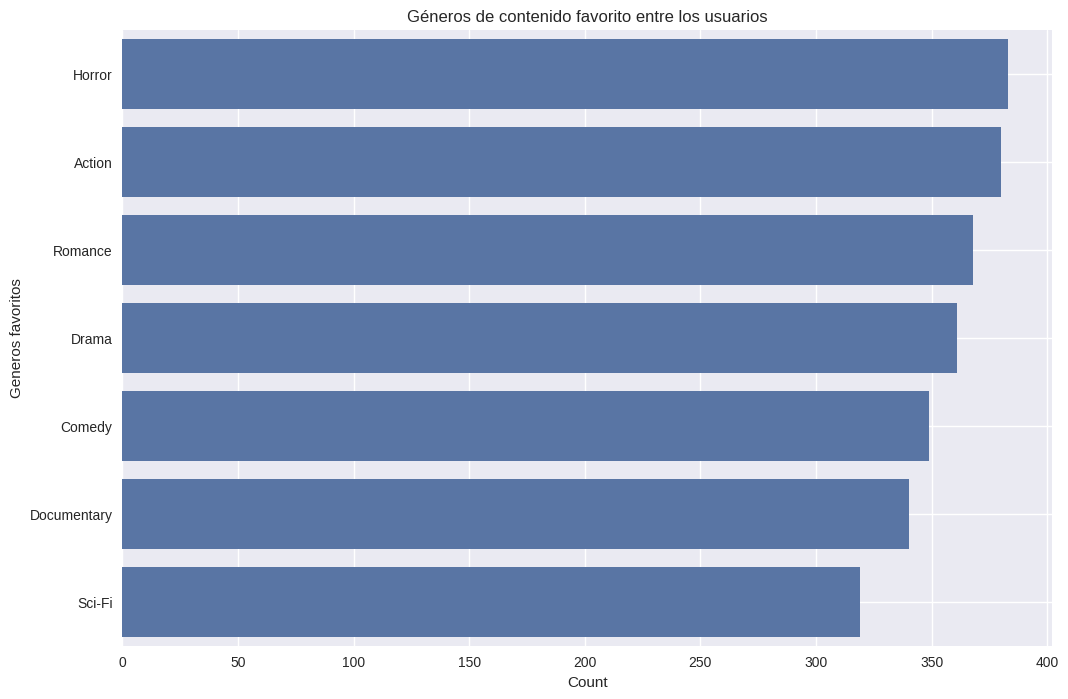

In [28]:
# Análisis de preferencias de contenido
plt.figure(figsize=(12, 8))
sns.countplot(y='Favorite Genres', data=df_amazon_prime, order=df_amazon_prime['Favorite Genres'].value_counts().index)
plt.title('Géneros de contenido favorito entre los usuarios')
plt.xlabel('Count')
plt.ylabel('Generos favoritos')
plt.grid(True)
plt.show()


### Comportamiento digital - Interaccion con la plataforma

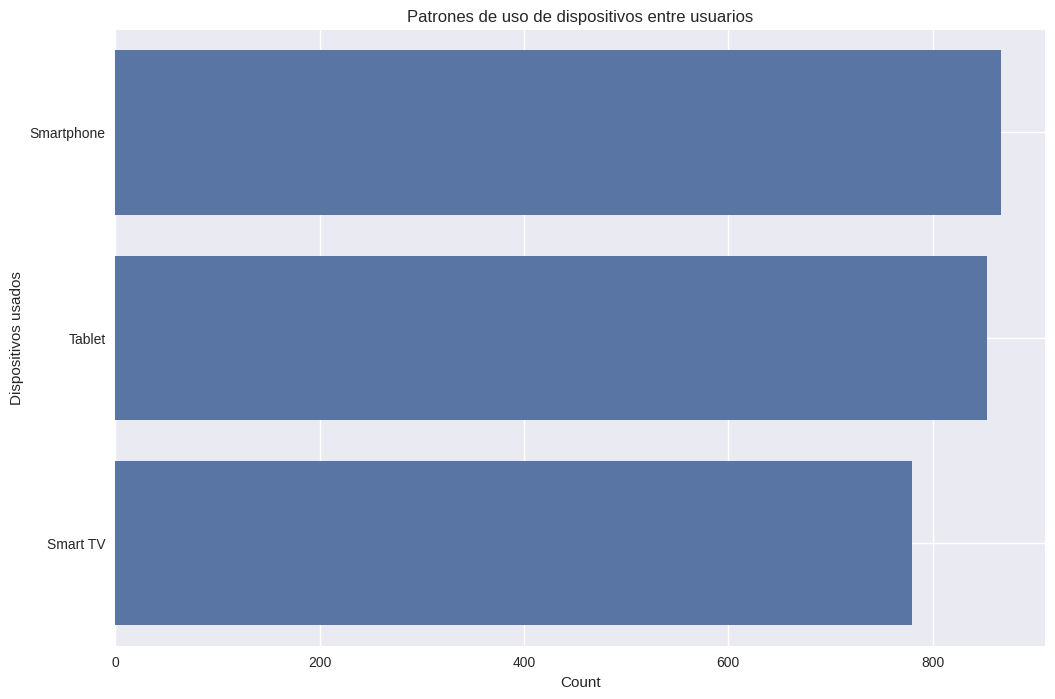

In [29]:
# Patrones de uso del dispositivo
plt.figure(figsize=(12, 8))
sns.countplot(y='Devices Used', data=df_amazon_prime, order=df_amazon_prime['Devices Used'].value_counts().index)
plt.title('Patrones de uso de dispositivos entre usuarios')
plt.xlabel('Count')
plt.ylabel('Dispositivos usados')
plt.grid(True)
plt.show()

# Etapa 4: Limpieza de datos

In [31]:
df_amazon_prime.isnull().sum()

User ID                          0
Name                             0
Email Address                    0
Username                         0
Date of Birth                    0
Gender                           0
Location                         0
Membership Start Date            0
Membership End Date              0
Subscription Plan                0
Payment Information              0
Renewal Status                   0
Usage Frequency                  0
Purchase History                 0
Favorite Genres                  0
Devices Used                     0
Engagement Metrics               0
Feedback/Ratings                 0
Customer Support Interactions    0
Age                              0
dtype: int64

In [32]:
df_amazon_prime.describe()

,User ID,Date of Birth,Membership Start Date,Membership End Date,Feedback/Ratings,Customer Support Interactions,Age
count,2500.00000,2500,2500,2500,2500.000000,2500.000000,2500.000000
mean,1250.50000,1969-10-10 10:15:10.080000,2024-02-21 21:11:48.480000,2025-02-20 21:11:48.480000,4.004760,4.951600,55.729200
min,1.00000,1933-04-26 00:00:00,2024-01-01 00:00:00,2024-12-31 00:00:00,3.000000,0.000000,19.000000
25%,625.75000,1951-04-30 00:00:00,2024-01-26 00:00:00,2025-01-25 00:00:00,3.500000,2.000000,37.000000
50%,1250.50000,1969-12-07 12:00:00,2024-02-22 00:00:00,2025-02-21 00:00:00,4.000000,5.000000,56.000000
75%,1875.25000,1988-03-28 06:00:00,2024-03-20 00:00:00,2025-03-20 00:00:00,4.500000,8.000000,74.000000
max,2500.00000,2006-04-11 00:00:00,2024-04-14 00:00:00,2025-04-14 00:00:00,5.000000,10.000000,92.000000
std,721.83216,NaN,NaN,NaN,0.580769,3.191572,21.045841


In [33]:
df_amazon_prime.shape

(2500, 20)

# RFM analisis

In [66]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt

print("INICIANDO ANÁLISIS RFM")
print("========================")

# CALCULAR RECENCY BASADO EN ANTIGÜEDAD
df_amazon_prime['Dias_Como_Cliente'] = (pd.Timestamp(date.today()) - df_amazon_prime['Membership Start Date']).dt.days

# RECENCY SCORE - BASADO EN ANTIGÜEDAD + ENGAGEMENT
def calcular_recency_score(dias_cliente, engagement):
    # Clientes nuevos con alto engagement = muy valiosos
    # Clientes antiguos con bajo engagement = en riesgo
    
    if dias_cliente <= 90 and engagement == 'High':
        return 3  # Cliente nuevo y muy activo
    elif dias_cliente <= 180 and engagement in ['High', 'Medium']:
        return 3  # Cliente estable y activo
    elif engagement == 'High':
        return 3  # Siempre activo
    elif engagement == 'Medium':
        return 2  # Moderadamente activo
    else:
        return 1  # Baja actividad

df_amazon_prime['Recency Score'] = df_amazon_prime.apply(
    lambda x: calcular_recency_score(x['Dias_Como_Cliente'], x['Engagement Metrics']), 
    axis=1
)

# FREQUENCY - Frecuencia de uso
frequency_map = {'Frequent': 3, 'Regular': 2, 'Occasional': 1}
df_amazon_prime['Frequency Score'] = df_amazon_prime['Usage Frequency'].map(frequency_map)

# MONETARY - Tipo de plan
monetary_map = {'Annual': 2, 'Monthly': 1}
df_amazon_prime['Monetary Score'] = df_amazon_prime['Subscription Plan'].map(monetary_map)

# RFM SCORE TOTAL
df_amazon_prime['RFM Score'] = (df_amazon_prime['Recency Score'] + 
                               df_amazon_prime['Frequency Score'] + 
                               df_amazon_prime['Monetary Score'])

print(f"\nPUNTAJES RFM CALCULADOS:")
print(f"Recency Score - Distribución:")
print(df_amazon_prime['Recency Score'].value_counts().sort_index())
print(f"Frequency Score - Distribución:")
print(df_amazon_prime['Frequency Score'].value_counts().sort_index())
print(f"Monetary Score - Distribución:")
print(df_amazon_prime['Monetary Score'].value_counts().sort_index())

# 7. SEGMENTACIÓN RFM
def asignar_segmento_rfm(score, dias_cliente, engagement):
    if score >= 8:
        return 'VIP - Alto Valor'
    elif score >= 7:
        return 'Leales - Estables'
    elif score >= 6:
        return 'Regulares - Buen Potencial'
    elif engagement == 'Low' and dias_cliente > 180:
        return 'En Riesgo - Antiguos Inactivos'
    elif engagement == 'Low':
        return 'En Riesgo - Bajo Engagement'
    else:
        return 'Ocasionales - Poco Frecuentes'

df_amazon_prime['RFM Segment'] = df_amazon_prime.apply(
    lambda x: asignar_segmento_rfm(x['RFM Score'], x['Dias_Como_Cliente'], x['Engagement Metrics']), 
    axis=1
)

# 8. MOSTRAR RESULTADOS
print("\nRESULTADOS RFM")
print("====================")

# Distribución de segmentos
rfm_segmentation = df_amazon_prime['RFM Segment'].value_counts().reset_index()
rfm_segmentation.columns = ['RFM Segment', 'Number of Users']

print("\nDISTRIBUCIÓN DE SEGMENTOS:")
for _, row in rfm_segmentation.iterrows():
    porcentaje = (row['Number of Users'] / len(df_amazon_prime)) * 100
    print(f"  {row['RFM Segment']}: {row['Number of Users']} usuarios ({porcentaje:.1f}%)")

# Mostrar muestra de usuarios
print(f"\nMUESTRA DE PRIMEROS 10 USUARIOS:")
muestra = df_amazon_prime[['User ID', 'Dias_Como_Cliente', 'Recency Score', 'Frequency Score', 'Monetary Score', 'RFM Score', 'RFM Segment']].head(10)
print(muestra)

INICIANDO ANÁLISIS RFM

PUNTAJES RFM CALCULADOS:
Recency Score - Distribución:
Recency Score
1    821
2    834
3    845
Name: count, dtype: int64
Frequency Score - Distribución:
Frequency Score
1    822
2    827
3    851
Name: count, dtype: int64
Monetary Score - Distribución:
Monetary Score
1    1229
2    1271
Name: count, dtype: int64

RESULTADOS RFM

DISTRIBUCIÓN DE SEGMENTOS:
  Regulares - Buen Potencial: 692 usuarios (27.7%)
  En Riesgo - Antiguos Inactivos: 674 usuarios (27.0%)
  Ocasionales - Poco Frecuentes: 567 usuarios (22.7%)
  Leales - Estables: 417 usuarios (16.7%)
  VIP - Alto Valor: 150 usuarios (6.0%)

MUESTRA DE PRIMEROS 10 USUARIOS:
   User ID  Dias_Como_Cliente  Recency Score  Frequency Score  Monetary Score  \
0        1                669              2                2               2   
1        2                677              2                2               1   
2        3                580              1                2               1   
3        4       

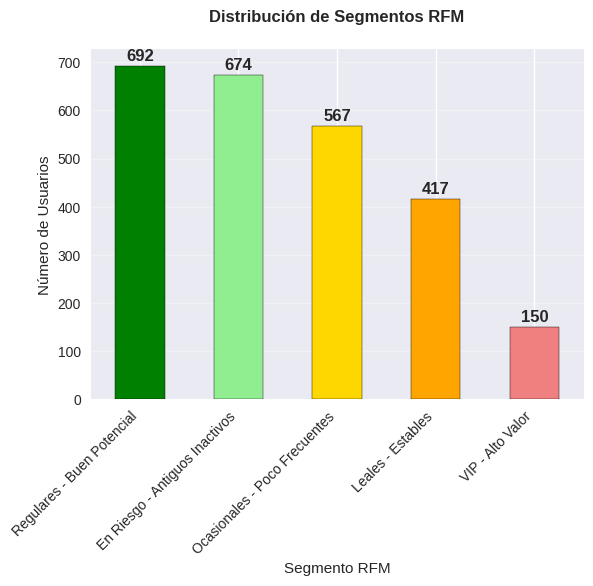


ANÁLISIS POR SEGMENTO

🔹 Regulares - Buen Potencial:
   Usuarios: 692 (27.7%)
   RFM Score promedio: 6.00
   Antigüedad promedio: 631 días
   Engagement: {'High': 285, 'Medium': 260, 'Low': 147}
   Frecuencia: {'Frequent': 289, 'Regular': 260, 'Occasional': 143}

🔹 Ocasionales - Poco Frecuentes:
   Usuarios: 567 (22.7%)
   RFM Score promedio: 4.76
   Antigüedad promedio: 631 días
   Engagement: {'Medium': 431, 'High': 136}
   Frecuencia: {'Occasional': 420, 'Regular': 147}

🔹 En Riesgo - Antiguos Inactivos:
   Usuarios: 674 (27.0%)
   RFM Score promedio: 4.23
   Antigüedad promedio: 629 días
   Engagement: {'Low': 674}
   Frecuencia: {'Regular': 278, 'Occasional': 259, 'Frequent': 137}

🔹 Leales - Estables:
   Usuarios: 417 (16.7%)
   RFM Score promedio: 7.00
   Antigüedad promedio: 632 días
   Engagement: {'High': 274, 'Medium': 143}
   Frecuencia: {'Frequent': 275, 'Regular': 142}

🔹 VIP - Alto Valor:
   Usuarios: 150 (6.0%)
   RFM Score promedio: 8.00
   Antigüedad promedio: 634 dí

In [67]:

# Gráfico: Distribución de Segmentos RFM
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
segmentos_counts = df_amazon_prime['RFM Segment'].value_counts()
colors = ['green', 'lightgreen', 'gold', 'orange', 'lightcoral', 'pink']
segmentos_counts.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Distribución de Segmentos RFM', fontweight='bold', pad=20)
plt.xlabel('Segmento RFM')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for i, valor in enumerate(segmentos_counts):
    plt.text(i, valor + 5, str(valor), ha='center', va='bottom', fontweight='bold')

plt.show()

print("\n" + "====================")
print("ANÁLISIS POR SEGMENTO")
print("===========================")

for segmento in df_amazon_prime['RFM Segment'].unique():
    segmento_data = df_amazon_prime[df_amazon_prime['RFM Segment'] == segmento]
    
    print(f"\n🔹 {segmento}:")
    print(f"   Usuarios: {len(segmento_data)} ({len(segmento_data)/len(df_amazon_prime)*100:.1f}%)")
    print(f"   RFM Score promedio: {segmento_data['RFM Score'].mean():.2f}")
    print(f"   Antigüedad promedio: {segmento_data['Dias_Como_Cliente'].mean():.0f} días")
    print(f"   Engagement: {segmento_data['Engagement Metrics'].value_counts().to_dict()}")
    print(f"   Frecuencia: {segmento_data['Usage Frequency'].value_counts().to_dict()}")


In [68]:
### LCTV (con valores imaginarios)

In [ ]:
import pandas as pd
import numpy as np

# Datos de ejemplo basados en el dataset proporcionado
segment_data = {
    'Segmento': ['VIP - Alto Valor', 'Leales - Estables', 'Regulares - Buen Potencial', 
                'Ocasionales - Poco Frecuentes', 'En Riesgo - Antiguos Inactivos'],
    'Usuarios': [150, 417, 692, 567, 674],
    'Subscription_Annual_Pct': [0.6, 0.4, 0.3, 0.2, 0.1],  # % de usuarios con plan anual
    'Subscription_Monthly_Pct': [0.4, 0.6, 0.7, 0.8, 0.9],  # % de usuarios con plan mensual
    'Frequent_Pct': [0.8, 0.5, 0.3, 0.1, 0.05],  # % de usuarios frecuentes
    'Regular_Pct': [0.2, 0.4, 0.5, 0.3, 0.15],   # % de usuarios regulares
    'Occasional_Pct': [0.0, 0.1, 0.2, 0.6, 0.8], # % de usuarios ocasionales
    'High_Engagement_Pct': [0.9, 0.6, 0.3, 0.1, 0.02],  # % con engagement alto
    'Medium_Engagement_Pct': [0.1, 0.3, 0.5, 0.4, 0.18], # % con engagement medio
    'Low_Engagement_Pct': [0.0, 0.1, 0.2, 0.5, 0.8]     # % con engagement bajo
}

df_segments = pd.DataFrame(segment_data)

# Valores base para cálculos
ANNUAL_SUBSCRIPTION = 120  # USD por año
MONTHLY_SUBSCRIPTION = 180  # USD por año (15*12)

# Multiplicadores de frecuencia
FREQUENT_MULTIPLIER = 1.2
REGULAR_MULTIPLIER = 1.0
OCCASIONAL_MULTIPLIER = 0.7

# Vida útil por nivel de engagement (años)
HIGH_ENGAGEMENT_LIFESPAN = 3
MEDIUM_ENGAGEMENT_LIFESPAN = 2
LOW_ENGAGEMENT_LIFESPAN = 1

# Calcular LCTV para cada segmento
lctv_results = []

for _, segment in df_segments.iterrows():
    # Calcular valor promedio de subscription
    avg_subscription = (segment['Subscription_Annual_Pct'] * ANNUAL_SUBSCRIPTION + 
                       segment['Subscription_Monthly_Pct'] * MONTHLY_SUBSCRIPTION)
    
    # Calcular multiplicador promedio de frecuencia
    avg_frequency_multiplier = (segment['Frequent_Pct'] * FREQUENT_MULTIPLIER +
                               segment['Regular_Pct'] * REGULAR_MULTIPLIER +
                               segment['Occasional_Pct'] * OCCASIONAL_MULTIPLIER)
    
    # Calcular vida útil promedio
    avg_lifespan = (segment['High_Engagement_Pct'] * HIGH_ENGAGEMENT_LIFESPAN +
                   segment['Medium_Engagement_Pct'] * MEDIUM_ENGAGEMENT_LIFESPAN +
                   segment['Low_Engagement_Pct'] * LOW_ENGAGEMENT_LIFESPAN)
    
    # Calcular LCTV individual
    lctv_individual = avg_subscription * avg_frequency_multiplier * avg_lifespan
    
    # Calcular LCTV total del segmento
    lctv_total = lctv_individual * segment['Usuarios']
    
    lctv_results.append({
        'Segmento': segment['Segmento'],
        'Usuarios': segment['Usuarios'],
        'LCTV_Individual_USD': round(lctv_individual, 2),
        'LCTV_Total_Segmento_USD': round(lctv_total, 2),
        'Avg_Subscription_USD': round(avg_subscription, 2),
        'Avg_Frequency_Multiplier': round(avg_frequency_multiplier, 2),
        'Avg_Lifespan_Years': round(avg_lifespan, 2)
    })

# Crear DataFrame de resultados
df_lctv = pd.DataFrame(lctv_results)

# Mostrar resultados
print("=== CÁLCULO DE LIFETIME CUSTOMER VALUE (LCTV) POR SEGMENTO ===")
print("\nResultados Detallados:")
print("=================================")
for _, result in df_lctv.iterrows():
    print(f"\n{result['Segmento']}:")
    print(f"  Usuarios: {result['Usuarios']}")
    print(f"  LCTV Individual: ${result['LCTV_Individual_USD']:,.2f} USD")
    print(f"  LCTV Total Segmento: ${result['LCTV_Total_Segmento_USD']:,.2f} USD")
    print(f"  Detalle: Subscription=${result['Avg_Subscription_USD']} × "
          f"Frecuencia={result['Avg_Frequency_Multiplier']} × "
          f"Vida={result['Avg_Lifespan_Years']} años")

# Resumen ejecutivo
print("\n" + "======================")
print("RESUMEN - LCTV POR SEGMENTO")
print("===============================")
for _, result in df_lctv.iterrows():
    print(f"  {result['Segmento']:.<30} ${result['LCTV_Individual_USD']:>8,.2f} USD")

# Calcular LCTV total de toda la base
lctv_total_base = df_lctv['LCTV_Total_Segmento_USD'].sum()
print(f"\nLCTV TOTAL BASE DE CLIENTES: ${lctv_total_base:,.2f} USD")

# Calcular valor relativo entre segmentos
vip_lctv = df_lctv[df_lctv['Segmento'] == 'VIP - Alto Valor']['LCTV_Individual_USD'].values[0]
leales_lctv = df_lctv[df_lctv['Segmento'] == 'Leales - Estables']['LCTV_Individual_USD'].values[0]

print(f"\n⚡ VALOR RELATIVO:")
print(f"  Un cliente VIP vale {vip_lctv/leales_lctv:.1f}x más que un cliente Leal")

=== CÁLCULO DE LIFETIME CUSTOMER VALUE (LCTV) POR SEGMENTO ===

Resultados Detallados:

VIP - Alto Valor:
  👥 Usuarios: 150
  💰 LCTV Individual: $484.42 USD
  📊 LCTV Total Segmento: $72,662.40 USD
  🔍 Detalle: Subscription=$144.0 × Frecuencia=1.16 × Vida=2.9 años

Leales - Estables:
  👥 Usuarios: 417
  💰 LCTV Individual: $417.30 USD
  📊 LCTV Total Segmento: $174,014.10 USD
  🔍 Detalle: Subscription=$156.0 × Frecuencia=1.07 × Vida=2.5 años

Regulares - Buen Potencial:
  👥 Usuarios: 692
  💰 LCTV Individual: $340.20 USD
  📊 LCTV Total Segmento: $235,418.40 USD
  🔍 Detalle: Subscription=$162.0 × Frecuencia=1.0 × Vida=2.1 años

Ocasionales - Poco Frecuentes:
  👥 Usuarios: 567
  💰 LCTV Individual: $225.79 USD
  📊 LCTV Total Segmento: $128,024.06 USD
  🔍 Detalle: Subscription=$168.0 × Frecuencia=0.84 × Vida=1.6 años

En Riesgo - Antiguos Inactivos:
  👥 Usuarios: 674
  💰 LCTV Individual: $163.46 USD
  📊 LCTV Total Segmento: $110,169.07 USD
  🔍 Detalle: Subscription=$174.0 × Frecuencia=0.77 × V